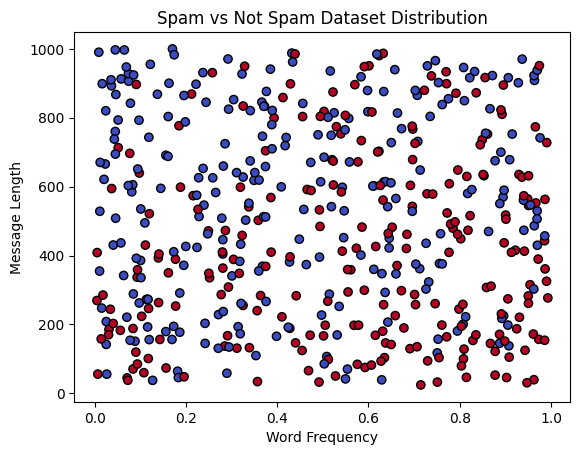

Confusion Matrix:
[[32 22]
 [19 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        54
           1       0.55      0.59      0.57        46

    accuracy                           0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.59      0.59      0.59       100



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create synthetic dataset
np.random.seed(42)
n_samples = 500

# Features: word frequency (0 to 1), message length (20 to 1000 words)
word_freq = np.random.rand(n_samples)
message_length = np.random.uniform(20, 1000, n_samples)

# Spam label: more likely spam if word_freq is high and message length is short
spam_prob = 0.5 * word_freq + 0.5 * (1 - message_length / 1000)
labels = (spam_prob > np.random.rand(n_samples)).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'word_frequency': word_freq,
    'message_length': message_length,
    'label': labels
})

# Plot the dataset
plt.scatter(df["word_frequency"], df["message_length"], c=df["label"], cmap="coolwarm", edgecolors="k")
plt.xlabel("Word Frequency")
plt.ylabel("Message Length")
plt.title("Spam vs Not Spam Dataset Distribution")
plt.show()

# Prepare features and labels
X = df[['word_frequency', 'message_length']]
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
